In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score


In [7]:
df = pd.read_csv('/home/code_wizard/coding_files/code_challenges/NFHS4DM.csv')
df

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
0,41,1,0.0,0.0,0.0,0.0,0,117.0,82.0,0,...,2,1,0,0,0,4,0,0,3,0
1,38,1,0.0,0.0,0.0,0.0,0,138.0,90.0,1,...,4,1,0,1,0,3,0,1,3,0
2,47,1,0.0,0.0,0.0,0.0,0,124.0,90.0,0,...,1,1,1,1,1,3,0,0,3,0
3,49,1,0.0,0.0,0.0,0.0,0,138.0,88.0,1,...,2,1,0,1,1,3,0,0,3,0
4,26,1,0.0,0.0,0.0,0.0,0,112.0,69.0,0,...,2,1,0,1,1,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,45,1,0.0,0.0,0.0,0.0,0,162.0,87.0,1,...,1,1,0,1,0,3,1,0,3,0
10121,47,1,0.0,0.0,0.0,0.0,0,133.0,85.0,0,...,1,1,0,0,0,3,1,0,3,0
10122,43,1,0.0,1.0,0.0,0.0,0,110.0,73.0,1,...,1,1,0,0,0,1,1,0,3,0
10123,39,1,0.0,0.0,0.0,0.0,0,121.0,92.0,0,...,1,1,1,1,0,3,0,0,3,0


In [8]:
df.isnull().sum()

Current.age                                           0
Sex                                                   0
Currently.has.asthma                                  0
Currently.has.thyroid.disorder                        0
Currently.has.heart.disease                           0
Currently.has.cancer                                  0
Suffers.from.TB                                       0
First.SYSTOLIC.reading                                0
First.DIASTOLIC.reading                               0
Currently.taking.a.prescribed.medicine.to.lower.BP    0
BMI                                                   0
Hemoglobin.level..g.dl...1.decimal.                   0
Frequency.takes.milk.or.curd                          0
Frequency.eats.pulses.or.beans                        0
Frequency.eats.dark.green.leafy.vegetable             0
Frequency.eats.fruits                                 0
Frequency.eats.eggs                                   0
Frequency.eats.fish                             

Text(0, 0.5, 'WCSS')

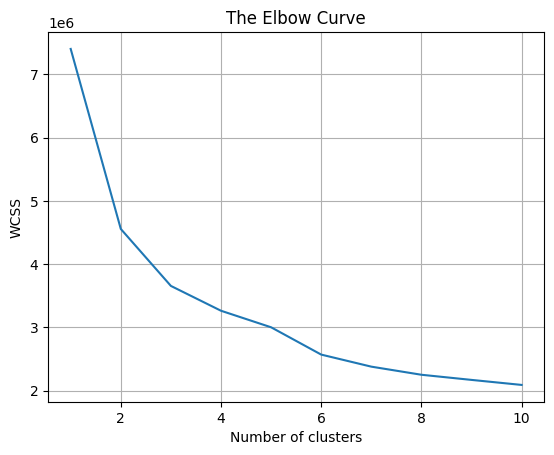

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
   

plt.plot(range(1,11),wcss)
plt.grid()
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [10]:
x = KMeans(n_clusters=3,init='k-means++',random_state=1)
clusters = x.fit_predict(df)
clusters

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [11]:
cluster={"1":[],
         "2":[],
         "3":[],
         "0":[]}

for i in range(len(clusters)):
    if clusters[i]==0:
        cluster["0"].append(i)
    if clusters[i]==1:
        cluster["1"].append(i)
    if clusters[i]==2:
        cluster["2"].append(i)
    if clusters[i]==3:
        cluster["3"].append(i)




df0=df.loc[cluster["0"]]
df1 = df.loc[cluster["1"]]
df2 = df.loc[cluster["2"]]
df3 = df.loc[cluster["3"]]

In [12]:
df1

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
0,41,1,0.0,0.0,0.0,0.0,0,117.0,82.0,0,...,2,1,0,0,0,4,0,0,3,0
4,26,1,0.0,0.0,0.0,0.0,0,112.0,69.0,0,...,2,1,0,1,1,1,0,0,3,0
5,47,1,0.0,0.0,0.0,0.0,0,111.0,79.0,0,...,4,1,0,1,1,3,1,0,3,0
8,40,1,0.0,0.0,0.0,0.0,0,86.0,52.0,0,...,2,1,0,1,0,3,1,1,3,0
11,27,0,0.0,0.0,0.0,0.0,0,109.0,82.0,0,...,4,1,0,1,1,3,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,43,1,1.0,0.0,0.0,0.0,0,113.0,89.0,0,...,1,0,0,0,0,2,1,1,2,15
10100,33,1,0.0,0.0,0.0,0.0,0,85.0,60.0,0,...,4,1,1,1,0,3,0,0,3,0
10111,46,0,0.0,0.0,0.0,0.0,0,106.0,74.0,0,...,3,0,1,1,1,3,0,0,3,0
10118,46,1,0.0,0.0,0.0,0.0,0,113.0,78.0,0,...,3,1,0,1,0,3,0,0,3,0


In [13]:
df2

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
6,44,1,0.0,0.0,0.0,0.0,0,156.0,106.0,0,...,4,0,0,1,1,3,1,0,3,0
21,50,0,1.0,0.0,0.0,0.0,0,151.0,100.0,1,...,1,0,0,1,0,3,1,0,3,0
31,43,1,0.0,1.0,0.0,0.0,0,153.0,108.0,0,...,1,1,0,1,1,3,1,0,3,0
43,54,0,0.0,0.0,0.0,0.0,0,153.0,88.0,0,...,4,1,0,1,1,3,1,0,3,0
51,54,0,0.0,0.0,0.0,0.0,0,151.0,87.0,1,...,4,0,0,0,0,3,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10082,54,0,0.0,0.0,0.0,0.0,0,158.0,100.0,0,...,2,1,0,1,1,3,0,1,2,0
10114,43,1,0.0,1.0,0.0,0.0,0,151.0,95.0,0,...,1,0,0,1,0,3,0,0,3,0
10115,45,1,0.0,0.0,1.0,0.0,0,177.0,101.0,1,...,4,1,0,1,0,3,0,0,3,0
10119,40,1,0.0,0.0,0.0,0.0,0,163.0,104.0,0,...,1,1,0,1,0,3,1,0,3,0


In [14]:
df3

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.


In [15]:
df0

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
1,38,1,0.0,0.0,0.0,0.0,0,138.0,90.0,1,...,4,1,0,1,0,3,0,1,3,0
2,47,1,0.0,0.0,0.0,0.0,0,124.0,90.0,0,...,1,1,1,1,1,3,0,0,3,0
3,49,1,0.0,0.0,0.0,0.0,0,138.0,88.0,1,...,2,1,0,1,1,3,0,0,3,0
7,46,1,0.0,0.0,0.0,0.0,0,139.0,91.0,0,...,1,1,0,1,0,3,1,0,3,0
9,40,1,0.0,0.0,0.0,0.0,0,128.0,89.0,1,...,4,1,0,1,0,3,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,45,1,0.0,0.0,0.0,0.0,0,118.0,84.0,0,...,1,0,0,0,0,3,1,0,3,0
10117,46,1,0.0,0.0,0.0,0.0,0,141.0,91.0,0,...,1,1,0,1,0,3,1,0,3,0
10121,47,1,0.0,0.0,0.0,0.0,0,133.0,85.0,0,...,1,1,0,0,0,3,1,0,3,0
10123,39,1,0.0,0.0,0.0,0.0,0,121.0,92.0,0,...,1,1,1,1,0,3,0,0,3,0


In [16]:
sil_score = silhouette_score(df,clusters)
sil_score 

np.float64(0.2623952596619155)